1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm
import warnings

In [3]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [4]:
data_m = data.resample('M').mean()
data_m = data_m[['PJME_MW', 'year', 'month']]
data_m.head()

,PJME_MW,year,month
Date,,,
2002-01-31,31075.399731,2002.0,1.0
2002-02-28,30239.166667,2002.0,2.0
2002-03-31,28875.256720,2002.0,3.0
2002-04-30,28534.731572,2002.0,4.0
2002-05-31,28073.653226,2002.0,5.0


2. Подберите параметры модели SARIMAX для этого ряда.

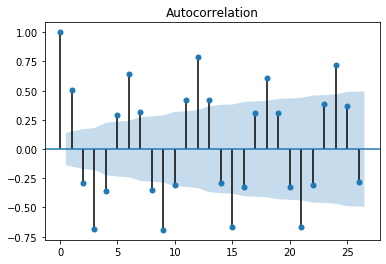

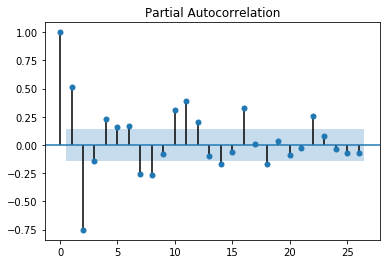

In [5]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=26)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=26)
plt.show()

In [84]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 0, 0, 24)
SARIMAX: (0, 0, 2) x (0, 0, 0, 24)
SARIMAX: (0, 0, 2) x (0, 0, 1, 24)


In [85]:
warnings.filterwarnings("ignore") # отключает предупреждения
lst = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
            lst.append(results.aic)
        except:
            continue
            
print(f'min aic ={min(lst)}')

ARIMA(0, 0, 0)x(0, 0, 0, 24)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 1, 24)3 - AIC:3739.656121515817
ARIMA(0, 0, 0)x(0, 0, 2, 24)3 - AIC:5189.816085268529
ARIMA(0, 0, 0)x(0, 1, 0, 24)3 - AIC:2971.5668206658843
ARIMA(0, 0, 0)x(0, 1, 1, 24)3 - AIC:2522.8166852431677
ARIMA(0, 0, 0)x(0, 1, 2, 24)3 - AIC:4798.501991777296
ARIMA(0, 0, 1)x(0, 0, 0, 24)3 - AIC:4259.479361221288
ARIMA(0, 0, 1)x(0, 0, 1, 24)3 - AIC:3683.132459306224
ARIMA(0, 0, 1)x(0, 0, 2, 24)3 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 24)3 - AIC:2924.1537138943213
ARIMA(0, 0, 1)x(0, 1, 1, 24)3 - AIC:2479.563069512302
ARIMA(0, 0, 1)x(0, 1, 2, 24)3 - AIC:5316.3601928855
ARIMA(0, 0, 2)x(0, 0, 0, 24)3 - AIC:4206.520029700199
ARIMA(0, 0, 2)x(0, 0, 1, 24)3 - AIC:3655.04664072228
ARIMA(0, 0, 2)x(0, 0, 2, 24)3 - AIC:nan
ARIMA(0, 0, 2)x(0, 1, 0, 24)3 - AIC:2908.485813491813
ARIMA(0, 0, 2)x(0, 1, 1, 24)3 - AIC:2462.3684254012405
ARIMA(0, 0, 2)x(0, 1, 2, 24)3 - AIC:4453.21092911091
ARIMA(0, 1, 0)x(0, 0, 0, 24)3 - AIC:3564.869515313325
AR

ARIMA(2, 2, 1)x(0, 1, 0, 24)3 - AIC:2960.2264161296303
ARIMA(2, 2, 1)x(0, 1, 1, 24)3 - AIC:2452.453687397506
ARIMA(2, 2, 1)x(0, 1, 2, 24)3 - AIC:4724.1404712668145
ARIMA(2, 2, 2)x(0, 0, 0, 24)3 - AIC:3339.4547331996428
ARIMA(2, 2, 2)x(0, 0, 1, 24)3 - AIC:2904.5658427220988
ARIMA(2, 2, 2)x(0, 0, 2, 24)3 - AIC:10283.302739052275
ARIMA(2, 2, 2)x(0, 1, 0, 24)3 - AIC:2928.993911592924
ARIMA(2, 2, 2)x(0, 1, 1, 24)3 - AIC:2430.2882352629517
ARIMA(2, 2, 2)x(0, 1, 2, 24)3 - AIC:4131.4282158842225
min aic =2406.783199266976


ARIMA(1, 1, 2)x(0, 1, 1, 24)3 - AIC:2406.783199266976

In [86]:
import warnings

# Определим p, d и q 
q = 2
p = 1
d = 1
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с недельными данными, тогда сезонность это 26 недель
qs = 1
ps = 0
ds = 1
seasonal_pdq = [ps, ds, qs ,24] 

In [87]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [1, 1, 2]    : ps,ds,qs, S= [0, 1, 1, 24]


In [88]:
#для построения модели используем все данные, кроме 12 последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[1, 1, 2]x[0, 1, 1, 24] - AIC:2406.783199266976


In [89]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(1, 1, 2)x(0, 1, 1, 24)   Log Likelihood               -1198.392
Date:                            Mon, 13 Jul 2020   AIC                           2406.783
Time:                                    01:49:52   BIC                           2421.346
Sample:                                         0   HQIC                          2412.701
                                            - 188                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4064      0.207      1.967      0.049       0.002       0.811
ma.L1         -1.0080      0.248     -4.066      0.000      -1.494      -0.522
ma.L2          0.0502      0.215      0.233      0.816      -0.372       0.472
ma.S.L24      -0.6478      0.050    -13.062      0.000      -0.745      -0.551
sigma2      2.433e+06   3.01e+05      8.086      0.000    1.84e+06    3.02e+06
===================================================================================
Ljung-Box (Q):                       80.04   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.00   Prob(JB):                         0.78
Heteroskedasticity (H):               1.00   Skew:                             0.15
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

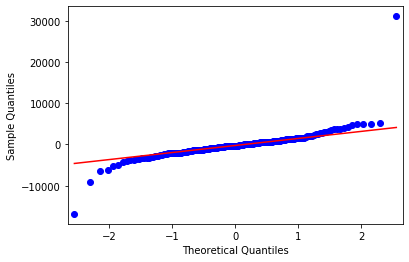

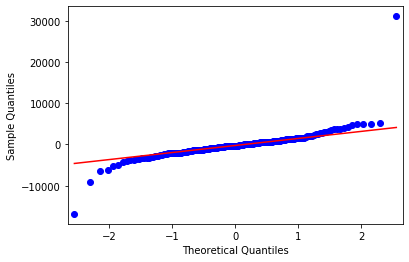

In [90]:
sm.qqplot(results.resid, line='q')

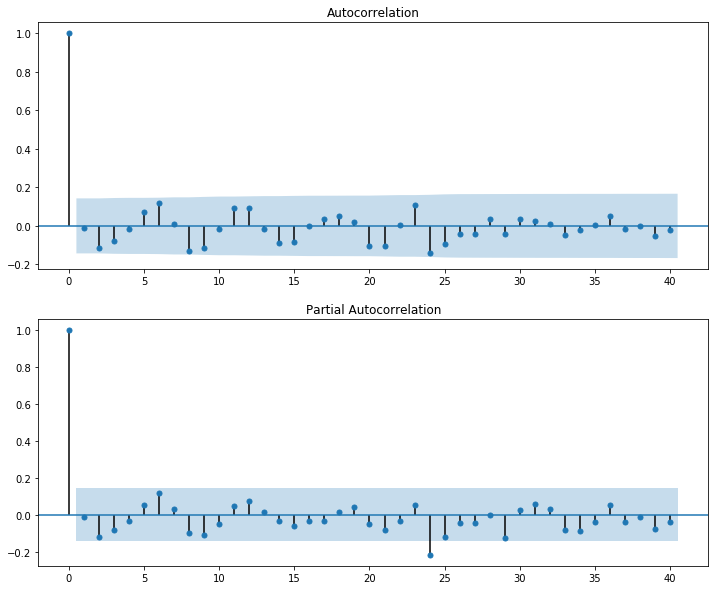

In [91]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)

In [92]:
start = 188
end = 199
preds = results.predict(start=start, end=end, typ='levels')

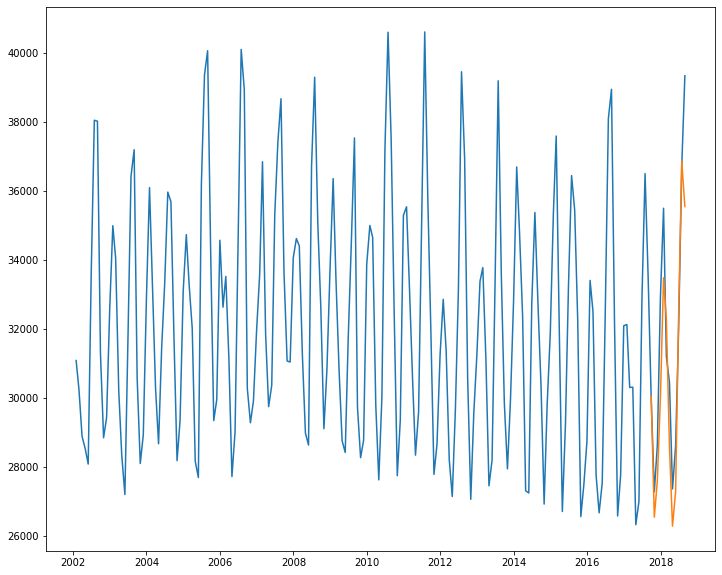

In [93]:
plt.figure(figsize=(12, 10))
plt.plot(data_m.index, data_m['PJME_MW'].values)
plt.plot(data_m.index[-12:],preds)

3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Предсказывать модель помесячно легче, чем понедельно, даже критерий информативности AIC нам об этом говорит, его значения для помесячной модели гораздно меньше

4. Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )

In [187]:
Covid = 'covid_19_data.csv'
Covid_data = pd.read_csv(Covid, index_col=[1], parse_dates=[1])
Covid_data=Covid_data[Covid_data['Country/Region']=='US']
Covid_data.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,32,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
2020-01-23,70,Washington,US,1/23/20 17:00,1.0,0.0,0.0
2020-01-24,118,Washington,US,1/24/20 17:00,1.0,0.0,0.0
2020-01-24,119,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
2020-01-25,159,Washington,US,1/25/20 17:00,1.0,0.0,0.0


In [188]:
groupby = Covid_data.groupby([Covid_data.index])
Covid_US=pd.DataFrame(groupby["Confirmed"].sum())
Covid_US.head()

,Confirmed
ObservationDate,
2020-01-22,1.0
2020-01-23,1.0
2020-01-24,2.0
2020-01-25,2.0
2020-01-26,5.0


In [189]:
type(Covid_US.index)

pandas.core.indexes.datetimes.DatetimeIndex

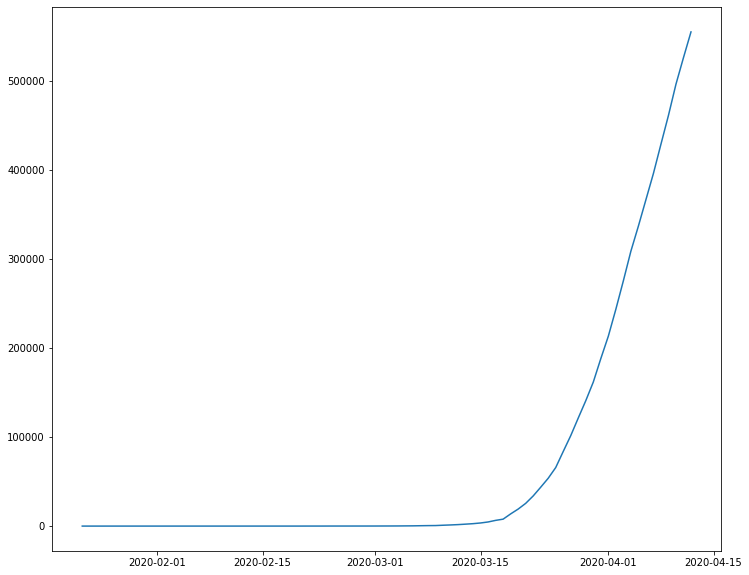

In [190]:
plt.figure(figsize=(12, 10))
plt.plot(Covid_US)

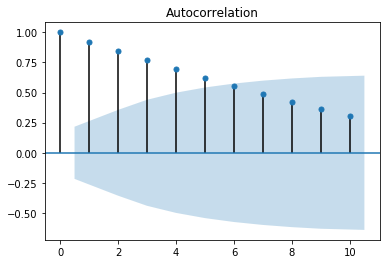

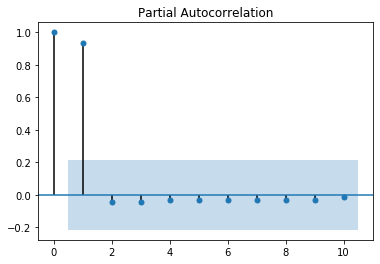

In [191]:
sm.graphics.tsa.plot_acf(Covid_US, lags=10)
plt.show()
sm.graphics.tsa.plot_pacf(Covid_US, lags=10)
plt.show()

In [194]:
import itertools
# Определим p, d и q 
d = [0,1]
p = [0,1,2] 
q = [1,2]
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

warnings.filterwarnings("ignore") # отключает предупреждения

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(Covid_US.values[:-10],
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

ARIMA(0, 0, 1)x[0, 0, 0, 0] - AIC:1663.144558956997
ARIMA(0, 0, 2)x[0, 0, 0, 0] - AIC:1969.2240526157045
ARIMA(0, 1, 1)x[0, 0, 0, 0] - AIC:1343.591884697823
ARIMA(0, 1, 2)x[0, 0, 0, 0] - AIC:1277.971950632094
ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:1209.5158578055662
ARIMA(1, 0, 2)x[0, 0, 0, 0] - AIC:1182.0073948370598
ARIMA(1, 1, 1)x[0, 0, 0, 0] - AIC:1158.0983921172876
ARIMA(1, 1, 2)x[0, 0, 0, 0] - AIC:1143.2148448877617
ARIMA(2, 0, 1)x[0, 0, 0, 0] - AIC:1174.7983294354897
ARIMA(2, 0, 2)x[0, 0, 0, 0] - AIC:1160.4031891978968
ARIMA(2, 1, 1)x[0, 0, 0, 0] - AIC:1158.4306442627442
ARIMA(2, 1, 2)x[0, 0, 0, 0] - AIC:1144.3151209560103


ARIMA(1, 1, 2)x[0, 0, 0, 0] - AIC:1143.2148448877617

In [195]:
# Определим p, d и q 
q = 2
p = 0
d = 1
pdq = [p, d, q]


warnings.filterwarnings("ignore") # отключает предупреждения

modb = sm.tsa.statespace.SARIMAX(Covid_US.values[:-10],
                               order=pdq,seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[1, 1, 2] - AIC:1143.2148448877617
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -565.607
Date:                Mon, 13 Jul 2020   AIC                           1143.215
Time:                        18:20:19   BIC                           1156.532
Sample:                             0   HQIC                          1148.491
                                 - 72                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   

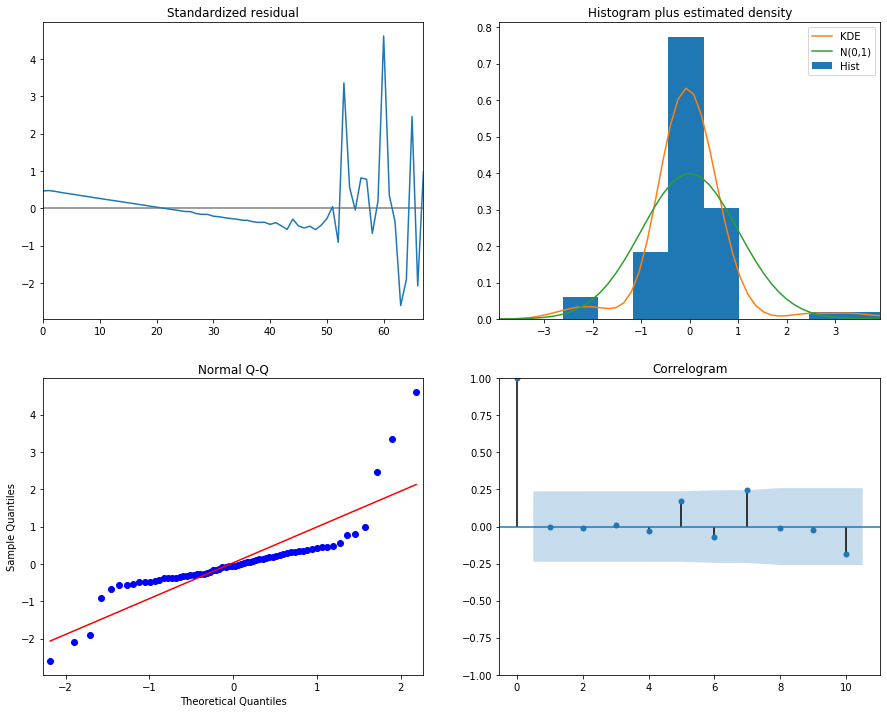

In [196]:
resultsb.plot_diagnostics(figsize=(15, 12))
plt.show()

5. Оцените результат моделирования - Остатки не распределены равномерно, модель получилась неудачная

In [200]:
resultsb.save('rez_model_covid.h5') # и обратно t_rez = sm.load('rez_model.h5')

6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

Модель ARIMA лучше всего использовать когда есть циклы, ряд повторяется со временем, для случая с covid на мой взгляд ARIMA - это неудачная модель. 